<a href="https://colab.research.google.com/github/heejjj/Image_Processing_Kor_Univ/blob/Kor_Univ/tf_0422_KU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Input
import numpy as np

In [2]:
model = Sequential()

In [3]:
model.add(Dense(100,activation='relu',input_shape=(2,)))

In [4]:
model.add(Dense(100,activation='sigmoid'))

In [5]:
model.add(Dense(10,activation='linear'))

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               300       
                                                                 
 dense_1 (Dense)             (None, 100)               10100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 11,410
Trainable params: 11,410
Non-trainable params: 0
_________________________________________________________________


In [7]:
layer1 = Dense(100,activation='relu',input_shape=(2,))
layer2 = Dense(50,activation='relu')
layer3 = Dense(10,activation='softmax')

In [8]:
model = Sequential()
model.add(layer1)
model.add(layer2)
model.add(layer3)
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 100)               300       
                                                                 
 dense_4 (Dense)             (None, 50)                5050      
                                                                 
 dense_5 (Dense)             (None, 10)                510       
                                                                 
Total params: 5,860
Trainable params: 5,860
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.predict(np.random.randn(100,2)).shape

4/4 [==============================] - 4s 5ms/step


(100, 10)

In [10]:
model = Sequential(
    [
        layer1,
        layer2,
        layer3
    ]
)

In [11]:
model.predict(np.random.randn(100,2)).shape

4/4 [==============================] - 0s 4ms/step


(100, 10)

In [12]:
input_ = Dense(100,activation='relu')

In [13]:
input_ = Input(shape=(2,))

In [14]:
layer1 = Dense(100,activation='relu')
layer2 = Dense(50,activation='relu')
layer3 = Dense(10,activation='relu')

In [15]:
x = layer1(input_)

In [16]:
x = layer2(x)

In [17]:
x = layer3(x)

In [18]:
model = Model(inputs=[input_],outputs=[x])

In [19]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 2)]               0         
                                                                 
 dense_7 (Dense)             (None, 100)               300       
                                                                 
 dense_8 (Dense)             (None, 50)                5050      
                                                                 
 dense_9 (Dense)             (None, 10)                510       
                                                                 
Total params: 5,860
Trainable params: 5,860
Non-trainable params: 0
_________________________________________________________________


In [20]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

In [21]:
(X_train, y_train), (X_test,y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [22]:
y_train = to_categorical(y_train)

In [23]:
X_train.shape, y_train.shape

((60000, 28, 28), (60000, 10))

In [24]:
model = Sequential(
    [
        Dense(100,activation='relu',input_shape=(X_train.shape[1]*X_train.shape[2],)),
        Dense(50,activation='relu'),
        Dense(10,activation='softmax')
    ]
)

In [25]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 100)               78500     
                                                                 
 dense_11 (Dense)            (None, 50)                5050      
                                                                 
 dense_12 (Dense)            (None, 10)                510       
                                                                 
Total params: 84,060
Trainable params: 84,060
Non-trainable params: 0
_________________________________________________________________


array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

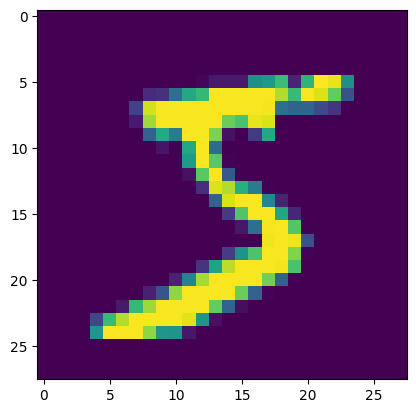

In [26]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0])
y_train[0]

In [27]:
# (28,28) --> --> --> (10)
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 100)               78500     
                                                                 
 dense_11 (Dense)            (None, 50)                5050      
                                                                 
 dense_12 (Dense)            (None, 10)                510       
                                                                 
Total params: 84,060
Trainable params: 84,060
Non-trainable params: 0
_________________________________________________________________


In [28]:
x = X_train[0].reshape(1,28*28)

In [29]:
np.argmax(model.predict(x))

1/1 [==============================] - 0s 66ms/step


0

In [30]:
model.predict(x)

1/1 [==============================] - 0s 20ms/step


array([[1.0000000e+00, 5.6622182e-27, 0.0000000e+00, 0.0000000e+00,
        8.9684157e-25, 0.0000000e+00, 1.5183862e-23, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00]], dtype=float32)

In [31]:
y_train[[0]]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]], dtype=float32)

In [32]:
np.nansum(-y_train[[0]]*np.log(model.predict(x)))

1/1 [==============================] - 0s 19ms/step


<ipython-input-32-9dd79f1a2869>:1: RuntimeWarning: divide by zero encountered in log
  np.nansum(-y_train[[0]]*np.log(model.predict(x)))
<ipython-input-32-9dd79f1a2869>:1: RuntimeWarning: invalid value encountered in multiply
  np.nansum(-y_train[[0]]*np.log(model.predict(x)))


inf

In [33]:
model.predict(x).shape

1/1 [==============================] - 0s 20ms/step


(1, 10)

In [34]:
y_train[[0]].shape

(1, 10)

In [35]:
model.predict(x)[0,5]

1/1 [==============================] - 0s 23ms/step


0.0

In [36]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 100)               78500     
                                                                 
 dense_11 (Dense)            (None, 50)                5050      
                                                                 
 dense_12 (Dense)            (None, 10)                510       
                                                                 
Total params: 84,060
Trainable params: 84,060
Non-trainable params: 0
_________________________________________________________________


In [37]:
opt = 'sgd'
loss = 'categorical_crossentropy'
metrics = ['accuracy']
model.compile(optimizer=opt,
             loss=loss,
             metrics=metrics)

In [38]:
model.layers[0].get_weights()[0]

array([[ 0.04526092,  0.0379815 ,  0.06884913, ..., -0.01478335,
         0.07189271,  0.07185414],
       [-0.00059137,  0.06355658,  0.00839631, ..., -0.07594129,
         0.02217899,  0.01871701],
       [ 0.04206798, -0.01689027,  0.02318826, ..., -0.06731576,
        -0.07801247,  0.0077268 ],
       ...,
       [ 0.03401357,  0.01136791,  0.04367854, ..., -0.00127413,
        -0.02616509,  0.03871139],
       [ 0.04446468, -0.06833985, -0.0286444 , ...,  0.06015687,
         0.02797242,  0.06599163],
       [ 0.04937325,  0.07857265, -0.04974365, ...,  0.05148263,
         0.06135586, -0.05759388]], dtype=float32)

In [39]:
X_train = X_train.reshape(-1,28*28)

In [40]:
model.fit(X_train,
         y_train,
         epochs=10,
         batch_size=100)

Epoch 1/10
600/600 [==============================] - 7s 7ms/step - loss: 68254.5469 - accuracy: 0.1122
Epoch 2/10
600/600 [==============================] - 2s 4ms/step - loss: 2.3014 - accuracy: 0.1124
Epoch 3/10
600/600 [==============================] - 3s 5ms/step - loss: 2.3012 - accuracy: 0.1124
Epoch 4/10
600/600 [==============================] - 3s 5ms/step - loss: 2.3012 - accuracy: 0.1124
Epoch 5/10
600/600 [==============================] - 4s 7ms/step - loss: 2.3012 - accuracy: 0.1124
Epoch 6/10
600/600 [==============================] - 3s 5ms/step - loss: 2.3012 - accuracy: 0.1124
Epoch 7/10
600/600 [==============================] - 3s 6ms/step - loss: 2.3012 - accuracy: 0.1124
Epoch 8/10
600/600 [==============================] - 3s 5ms/step - loss: 2.3012 - accuracy: 0.1124
Epoch 9/10
600/600 [==============================] - 4s 6ms/step - loss: 2.3012 - accuracy: 0.1124
Epoch 10/10
600/600 [==============================] - 3s 4ms/step - loss: 2.3012 - accuracy: 0.

In [41]:
x = np.random.randn(10,10,3)

In [42]:
x.reshape(10*10,-1).shape

(100, 3)

In [43]:
from tensorflow.keras.layers import ReLU

In [44]:
model = Sequential(
    [
        Dense(128,activation='relu',input_shape=(784,)),
        Dense(64),
        ReLU(),
        Dense(10,activation='softmax')
    ]
)

In [45]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()

In [46]:
X_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [47]:
X_train_trans = X_train.reshape(-1,28*28)
y_train_trans = to_categorical(y_train)

In [48]:
model.compile(
    optimizer='rmsprop',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

In [49]:
model.fit(X_train_trans,
         y_train_trans,
         epochs=10,
         batch_size=1000)

Epoch 1/10
60/60 [==============================] - 1s 5ms/step - loss: 9.0236 - accuracy: 0.7348
Epoch 2/10
60/60 [==============================] - 0s 4ms/step - loss: 1.2746 - accuracy: 0.8881
Epoch 3/10
60/60 [==============================] - 0s 4ms/step - loss: 0.6605 - accuracy: 0.9215
Epoch 4/10
60/60 [==============================] - 0s 5ms/step - loss: 0.4120 - accuracy: 0.9414
Epoch 5/10
60/60 [==============================] - 0s 6ms/step - loss: 0.2976 - accuracy: 0.9510
Epoch 6/10
60/60 [==============================] - 0s 8ms/step - loss: 0.2254 - accuracy: 0.9595
Epoch 7/10
60/60 [==============================] - 0s 7ms/step - loss: 0.1815 - accuracy: 0.9652
Epoch 8/10
60/60 [==============================] - 0s 7ms/step - loss: 0.1389 - accuracy: 0.9711
Epoch 9/10
60/60 [==============================] - 0s 4ms/step - loss: 0.1190 - accuracy: 0.9737
Epoch 10/10
60/60 [==============================] - 0s 3ms/step - loss: 0.0980 - accuracy: 0.9776


In [50]:
first = []
for i in range(10):
    first.append(np.argmax(model.predict(X_train[[i]].reshape(1,784))))

1/1 [==============================] - 0s 18ms/step


In [51]:
first == y_train[:10]

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [52]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [53]:
model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])
model.fit(X_train_trans,
         y_train_trans,
         epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4653 - accuracy: 0.9417
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3195 - accuracy: 0.9486
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2656 - accuracy: 0.9522
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2472 - accuracy: 0.9556
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2436 - accuracy: 0.9576
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2401 - accuracy: 0.9592
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2347 - accuracy: 0.9600
Epoch 8/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2543 - accuracy: 0.9603
Epoch 9/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2452 - accuracy: 0.9596
Epoch 10/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.245

In [54]:
second = []
for i in range(10):
    second.append(np.argmax(model.predict(X_train[[i]].reshape(1,784))))

1/1 [==============================] - 0s 28ms/step


In [55]:
second == y_train[:10]

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [56]:
from tensorflow.keras.datasets import cifar10

In [57]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 3s 0us/step


In [58]:
from tensorflow.keras.layers import Dense, Flatten, Input, BatchNormalization, Dropout
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.utils import to_categorical

In [59]:
def to_category(x):
    y_axis = max(x)[0]+1
    x_axis = len(x)
    tmp = np.zeros((x_axis,y_axis))
    for idx,val in enumerate(x):
        tmp[idx,val] = 1
    return tmp

In [60]:
X_train.shape, y_train.shape

((50000, 32, 32, 3), (50000, 1))

In [61]:
y_train_trans = to_category(y_train)

In [62]:
X_train_trans = X_train.reshape(-1,np.cumprod(X_train.shape[1:])[-1])

In [63]:
X_train_trans.shape, y_train_trans.shape

((50000, 3072), (50000, 10))

In [64]:
model = Sequential(
    [
        Dense(2048,activation='relu',input_shape=X_train_trans.shape[1:]),
        Dense(1024,activation='relu'),
        Dense(256,activation='relu'),
        Dense(y_train_trans.shape[-1],activation='softmax')
    ]
)

In [65]:
model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [66]:
model.fit(X_train_trans,
         y_train_trans,
         epochs=10,
         batch_size=512)

Epoch 1/10
98/98 [==============================] - 5s 12ms/step - loss: 214.4470 - accuracy: 0.1522
Epoch 2/10
98/98 [==============================] - 1s 10ms/step - loss: 2.3437 - accuracy: 0.2698
Epoch 3/10
98/98 [==============================] - 1s 10ms/step - loss: 2.6980 - accuracy: 0.2571
Epoch 4/10
98/98 [==============================] - 1s 10ms/step - loss: 1.9378 - accuracy: 0.3302
Epoch 5/10
98/98 [==============================] - 1s 10ms/step - loss: 1.8415 - accuracy: 0.3598
Epoch 6/10
98/98 [==============================] - 1s 9ms/step - loss: 1.8140 - accuracy: 0.3681
Epoch 7/10
98/98 [==============================] - 1s 10ms/step - loss: 1.7610 - accuracy: 0.3831
Epoch 8/10
98/98 [==============================] - 1s 10ms/step - loss: 1.7049 - accuracy: 0.4018
Epoch 9/10
98/98 [==============================] - 1s 13ms/step - loss: 1.6527 - accuracy: 0.4222
Epoch 10/10
98/98 [==============================] - 1s 11ms/step - loss: 1.6433 - accuracy: 0.4249


In [67]:
layer1 = Dense(2048,activation='relu',input_shape=X_train_trans.shape[1:]),
layer2 = Dense(1024,activation='relu'),
layer3 = Dense(256,activation='relu'),
layer4 = Dense(y_train_trans.shape[-1],activation='softmax')
batchlayer = BatchNormalization()

In [68]:
model1 = Sequential(
    [
        Dense(2048,activation='relu',input_shape=X_train_trans.shape[1:]),
        Dense(1024,activation='relu'),
        Dense(256,activation='relu'),
        Dense(y_train_trans.shape[-1],activation='softmax')
    ]
)

In [69]:
model2 = Sequential(
    [
        Dense(2048,activation='relu',input_shape=X_train_trans.shape[1:]),
        BatchNormalization(),
        Dense(1024,activation='relu'),
        BatchNormalization(),
        Dense(256,activation='relu'),
        BatchNormalization(),
        Dense(y_train_trans.shape[-1],activation='softmax')
    ]
)

In [71]:
model2 = Sequential(
    [
        Dense(2048,activation='relu',input_shape=X_train_trans.shape[1:]),
        BatchNormalization(),
        Dense(1024,activation='relu'),
        BatchNormalization(),
        Dense(256,activation='relu'),
        BatchNormalization(),
        Dropout(0.5),
        Dense(y_train_trans.shape[-1],activation='softmax')
    ]

)

TypeError: ignored

In [72]:
model2.layers[0].set_weights(model1.layers[0].get_weights())
model2.layers[2].set_weights(model1.layers[1].get_weights())
model2.layers[4].set_weights(model1.layers[2].get_weights())
nmodel2.layers[6].set_weights(model1.layers[3].get_weights())

In [73]:
opt = 'adam'
loss = 'categorical_crossentropy'
metrics = ['accuracy']
model1.compile(optimizer=opt, loss=loss, metrics=metrics)
model2.compile(optimizer=opt, loss=loss, metrics=metrics)

In [74]:
model1.fit(X_train_trans,
          y_train_trans,
          epochs=10)
model2.fit(X_train_trans,
          y_train_trans,
          epochs=10)

Epoch 1/10
1563/1563 [==============================] - 8s 4ms/step - loss: 21.7657 - accuracy: 0.2573
Epoch 2/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.9219 - accuracy: 0.3128
Epoch 3/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.8463 - accuracy: 0.3347
Epoch 4/10
1563/1563 [==============================] - 10s 6ms/step - loss: 1.7857 - accuracy: 0.3585
Epoch 5/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.7692 - accuracy: 0.3602
Epoch 6/10
1563/1563 [==============================] - 10s 7ms/step - loss: 1.7357 - accuracy: 0.3756
Epoch 7/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.7143 - accuracy: 0.3826
Epoch 8/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.6894 - accuracy: 0.3915
Epoch 9/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.6774 - accuracy: 0.3944
Epoch 10/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.

In [76]:
model1.fit(X_train_trans,
          y_train_trans,
          epochs=10,
          batch_size=1090,
           validation_data=(X_test_trans, y_test_trans))
model2.fit(X_train_trans,
          y_train_trans,
          epochs=10)

NameError: ignored

In [75]:
model1.evaluate(X_test_trans, y_test_trans)

NameError: ignored

In [ ]:
model2.evaluate(X_test_trans, y_test_trans)

In [ ]:
#Flatten(input_shape=(28,28,3))

model = Sequential(
    [
        Flatten(input_shape = X_train.shape[1:],
                Dense(2028, activation='relu'),
                BatchNormalization(),
                Dense(1024, activation='relu'),
                Dense(512, activation='relu'),
                Dropout(0.5),
                Dense(y_train_trans.shape[-1], activation='softmax')

    ]
)

In [ ]:
model.compile(optimizer='adam', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.layers[0].get_weights() #0번 layer는  weight이 없음

In [ ]:
model.layers[2].get_weights()[1].size

In [ ]:
#Cov layers 합성곱

In [ ]:
X_train[0]

#X_train[0]/255 =-> scale

In [ ]:
def min_max_scale(x):
  r = max(x) - min(x) -> 범위
  m = max(x)
  return (x-m)/r 
